# Bayesian Priors and Working with Probability Distributions

## Examples

### Determining C-3P0's Beliefs

C3P0 says that the odds of surviving the asteroid field are 3,720 to 1.  From this we must approximate the underlying data to build our distribution on.  We could assume that the data shows 3,720 failures and 1 success.  The book uses 7,440 failures and 2 successes instead.  This isn't unreasonable because only one success in thousands of tries could be a fluke.

Let the following:
* $\alpha = 2$
* $\beta = 7,440$

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

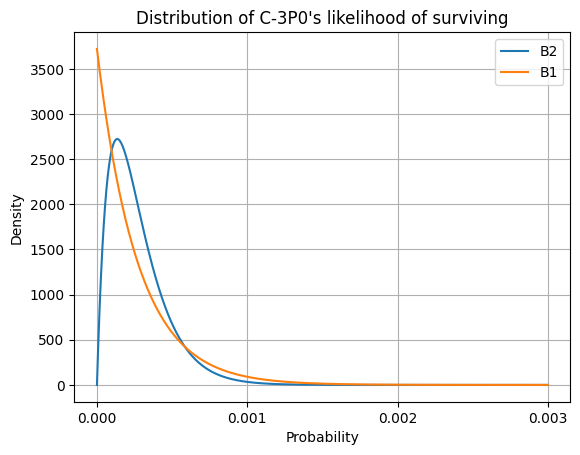

In [77]:
fig, ax = plt.subplots(1, 1)

a2 = 2
b2 = 7_400
a1 = 1
b1 = 3_720


x = np.linspace(0, 0.003, 1000)

ax.set_title("Distribution of C-3P0's likelihood of surviving")
ax.set_xlabel("Probability")
ax.set_ylabel("Density")
ax.set_xticks(np.linspace(0, 0.003, 4))
ax.plot(x, beta.pdf(x, a2, b2), label="B2")
ax.plot(x, beta.pdf(x, a1, b1), label="B1")
ax.legend()
ax.grid(True)
plt.show()

The graph above contains both the book's suggested $\alpha$ and $\beta$ as B2, and the $\alpha$ and $\beta$ implied by the reduced fraction.  It's clear that the beta distribution collapses when $\alpha$ is only 1, as it looks like a hyperbola.

### Accounting for Han's Badassery

The book assumes a prior belief (prior probability) that Han will survive of 20,000:1.  We can use t his to create a beta distribution with $\alpha = 20,000$ and $\beta = 1$

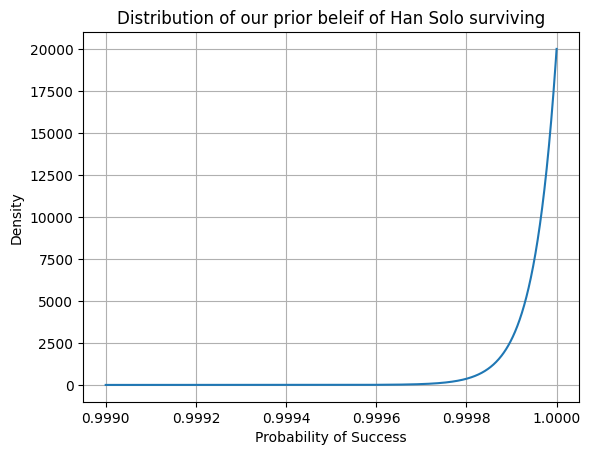

In [78]:
a = 20_000
b = 1

x = np.linspace(0.999, 1, 1000)

fig, ax = plt.subplots(1,1)
ax.set_title("Distribution of our prior beleif of Han Solo surviving")
ax.set_xlabel("Probability of Success")
ax.set_ylabel("Density")
ax.grid(True)
ax.plot(x, beta.pdf(x, a, b))
plt.show()

Oh look, this beta distribution with $\alpha = 1$ shows similar asymptotic behavior to the previous graph.

### Creating Suspense with a Posterior

The formula for computing the posterior beleif is as follows:
$$
\textrm{Posterior} \propto \textrm{Likelihood} \times \textrm{Prior}
$$

To combine beta distributions in this way, we simply add their $\alpha$ and $\beta$ together:

$$
\textrm{Beta} \left({\alpha_\textrm{posterior}, \beta_\textrm{posterior}} \right) = 
\textrm{Beta} \left( {\alpha_\textrm{likelihood}} + 
\alpha_\textrm{prior}, {\beta_\textrm{likelihood}} + \beta_\textrm{prior} \right)
$$

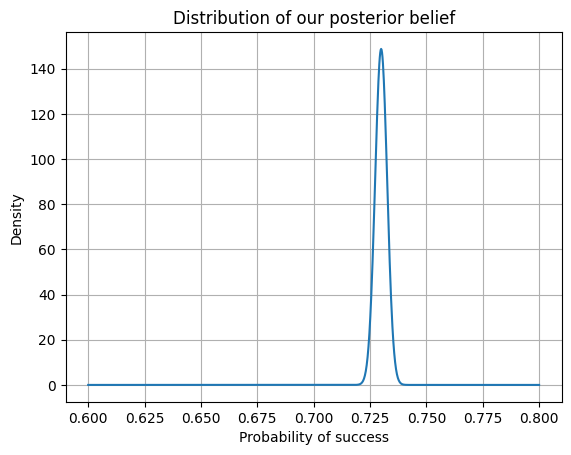

In [79]:
al = 2
bl = 7_400
apr = 20_000
bpr =1

ap = al+apr
bp = bl+bpr

x = np.linspace(.6, .8, 1000)

fig, ax = plt.subplots(1,1)
ax.set_title("Distribution of our posterior belief")
ax.set_xlabel("Probability of success")
ax.set_ylabel("Density")
ax.grid(True)
ax.plot(x, beta.pdf(x, ap, bp))
plt.show()

## Exercises

1. A friend finds a coin on the ground flips it, and gets six heads in a row and then one tails.  Give the beta distribution that describes this.  Use integration to determine the probability that the true rate of flipping heads is between 0.4 and 0.6, reflecting that the coin is reasonably fair.
2. Come up with a prior probability that the coin _is_ fair.  Use a beta distribution such that there is at least a 95 percent chance that the true rate of flipping heads is between 0.4 and 0.6.
3. Now see how many more heads (with no more tails) it would take to convince you that there is a reasonable chance that the coin is _not_ fair.  In this case, let's say that this means that our beleif in the rate of the coin being between 0.4 and 0.6 drops below 0.5.

## Responses

### Exercise 1

> 1. A friend finds a coin on the ground flips it, and gets six heads in a row and then one tails.  Give the beta distribution that describes this.  Use integration to determine the probability that the true rate of flipping heads is between 0.4 and 0.6, reflecting that the coin is reasonably fair.

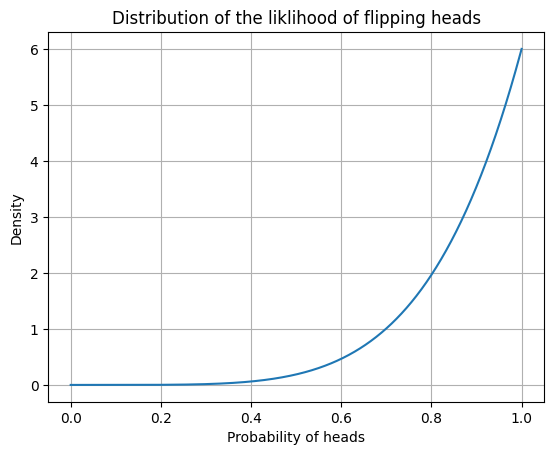

In [80]:
a = 6
b = 1

x = np.linspace(0, 1, 1000)

fig, ax, = plt.subplots(1,1)
ax.set_title("Distribution of the liklihood of flipping heads")
ax.set_xlabel("Probability of heads")
ax.set_ylabel("Density")
ax.grid(True)
ax.plot(x, beta.pdf(x, a, b))
plt.show()




In [81]:
a = 6
b = 1

right_bound = beta.cdf(0.6, a, b)
left_bound = beta.cdf(0.4, a, b)

prob_fair = right_bound - left_bound
print(f"The probability that the coin is fair is: {prob_fair:.4}")

The probability that the coin is fair is: 0.04256


### Exercise 2

> 2. Come up with a prior probability that the coin _is_ fair.  Use a beta distribution such that there is at least a 95 percent chance that the true rate of flipping heads is between 0.4 and 0.6.

We want a beta distribution where 95% of the area is between 0.4 and 0.6.  I don't know how to design a beta distribution to my specifications, so I'll have to do it via trial and error.  The good news is that to represent a fair coin, $\alpha$ and $\beta$ should be equal.  The only question is how many trials are required to get our confidence high enough.

In [82]:
def compute_confidence(trials: int) -> float:
    return beta.cdf(0.6, trials, trials) - beta.cdf(0.4, trials, trials)

trials = confidence = 0
while confidence < 0.95:
    trials += 1
    confidence = compute_confidence(trials)
print(f"{trials} each heads and tails provides a confidence of {confidence}")


48 each heads and tails provides a confidence of 0.9516743083038139


The distribution beta(48,48) gives a 0.9516 chance that the true probability of flipping heads is between 0.4 and 0.6, so we will use that to model our prior beleif.

To find the posterior probability distribution that this specific coin is fair, we combine the prior and likelihood distributions, as described in the [examples](#examples):

$$
\textrm{Beta} \left({\alpha_\textrm{posterior}, \beta_\textrm{posterior}} \right) = 
\textrm{Beta} \left( {\alpha_\textrm{likelihood}} + 
\alpha_\textrm{prior}, {\beta_\textrm{likelihood}} + \beta_\textrm{prior} \right)
$$

$$
\textrm{Beta} \left({\alpha_\textrm{posterior}, \beta_\textrm{posterior}} \right) = 
\textrm{Beta} \left( {6} + 
48, {1} + 48 \right)
$$

$$
\textrm{Beta} \left({\alpha_\textrm{posterior}, \beta_\textrm{posterior}} \right) = 
\textrm{Beta} \left( 54, 49 \right)
$$

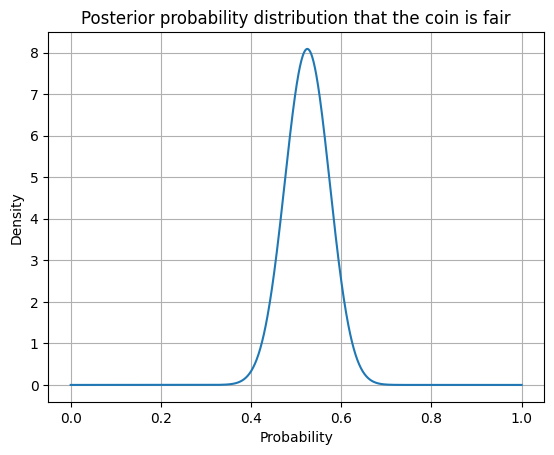

In [83]:
fig, ax = plt.subplots(1,1)

posterior_alpha = 54
posterior_beta = 49

x = np.linspace(0, 1, 1000)
ax.grid(True)
ax.set_title("Posterior probability distribution that the coin is fair")
ax.set_xlabel("Probability")
ax.set_ylabel("Density")
ax.plot(x, beta.pdf(x, posterior_alpha, posterior_beta))
plt.show()

In [84]:
posterior_alpha = 54
posterior_beta = 49

confidence = beta.cdf(.6, posterior_alpha, posterior_beta) - beta.cdf(.4, posterior_alpha, posterior_beta)

print(f"The posterior probability that the coin is fair is: {confidence:.4}")

The posterior probability that the coin is fair is: 0.9338


My answer is slightly lower than the book's reference answer.  This is because I used the weakest possible prior belief that met the criteria.  I used 48 heads and tails each while the book used 55 each.  Being slightly less sure that most coins are fair leaves me similarly slightly less sure that this coin is fair.  Or I should say, it allows this coin's run of results to be slightly more persuasive. 

I have run the calculations again using the book's prior distribution and I get the same results.

### Exercise 3

> 3. Now see how many more heads (with no more tails) it would take to convince you that there is a reasonable chance that the coin is _not_ fair.  In this case, let's say that this means that our beleif in the rate of the coin being between 0.4 and 0.6 drops below 0.5.

In [87]:
prior_heads = 48
prior_tails = 48
initial_heads = 6
initial_tails = 1
additional_heads = 0 

while True:
    posterior_heads = prior_heads + initial_heads + additional_heads
    posterior_tails = prior_tails + initial_tails
    confidence = beta.cdf(.6, posterior_heads, posterior_tails) - beta.cdf(.4, posterior_heads, posterior_tails)
    if confidence < 0.5:
        break
    else:
        additional_heads += 1

print(f"After {additional_heads} heads, confidence that the coin is fair would be {confidence}")

After 20 heads, confidence that the coin is fair would be 0.48036216536252613
